In [1]:
from fastapi import FastAPI, File, UploadFile
from fastapi.encoders import jsonable_encoder
from fastapi.responses import JSONResponse
from fastapi.middleware.cors import CORSMiddleware
from starlette.middleware.cors import CORSMiddleware
import json
from yahoofinancials import YahooFinancials as YF
import time
from datetime import datetime
import pandas as pd
from pandas_datareader import data
from typing import List, Optional
import os
import pickle 
from tqdm import tqdm
import scipy.stats as sp
from utils import *
from pydantic import BaseModel
from backtester import *
import matplotlib.pyplot as plt


In [1]:
stocks = getStocks('MMM',50)

NameError: name 'getStocks' is not defined

In [2]:


class Weights(BaseModel):
    weights:  List[float] = []



weights_data: Weights = {
            "weights":
                {
                    "GOOG": 0.33,
                    "MMM": 0.33
                }
        }
tickers = ['MMM']
initial_captial = 100

strategy = [
    {
        'name': 'weighted',
        'params': weights_data
    }
]

print(strategy[0]['params']['weights'].items())
with open("./stocks.pkl", "rb") as pkl_handle:
    bars = pickle.load(pkl_handle)
#tickers = [ticker]
bars = {key: bars[key] for key in tickers}
bars = addReturns(bars, 'Close')
bars.keys()

dict_items([('GOOG', 0.33), ('MMM', 0.33)])


AttributeError: Can't get attribute 'new_block' on <module 'pandas.core.internals.blocks' from 'C:\\Users\\moyer\\OneDrive\\development\\fintech\\quant\\lib\\site-packages\\pandas\\core\\internals\\blocks.py'>

In [4]:


rfs = RandomStrategy(tickers, bars, strategy)
signals = rfs.genSignals()

signals
# portfolio = MyPortfolio(tickers, bars, signals, initial_captial)
# returns = portfolio.backtest_portfolio()
# forecasted_initial_cap = returns['total'].iat[-1]
# last_date = portfolio.bars['GOOG'].index[-1].strftime("%m/%d/%Y, %H:%M:%S")
# last_date
# forecast = portfolio.forecast_portfolio()
# forecast = addReturns(forecast, 'yhat')

# forecast_rfs = RandomStrategy(tickers, forecast, strategy)
# forecasted_signals = forecast_rfs.genSignals()
# forecasted_portfolio = MyPortfolio(tickers,forecast, forecasted_signals, initial_captial)
# forecast_returns = forecasted_portfolio.backtest_forecast()

TypeError: __init__() takes 3 positional arguments but 4 were given

In [3]:
returns.tail()

,GOOG,MMM,GOOG_position,GOOG_pos_diff,MMM_position,MMM_pos_diff,GOOG_cash,GOOG_holdings,GOOG_open,GOOG_close,MMM_cash,MMM_holdings,MMM_open,MMM_close,holdings,cash_diff,cash,total,returns,date
Date,,,,,,,,,,,,,,,,,,,,
2021-03-08,0.33,0.33,0.33,0.0,0.33,0.0,0.0,693.372861,2101.129883,2024.170044,0.0,59.726702,180.990005,183.770004,753.099563,0.0,-558.894508,194.205055,0.054754,03/08/2021
2021-03-09,0.33,0.33,0.33,0.0,0.33,0.0,0.0,683.100000,2070.000000,2052.699951,0.0,60.555000,183.500000,181.179993,743.655000,0.0,-558.894508,184.760492,-0.048632,03/09/2021
2021-03-10,0.33,0.33,0.33,0.0,0.33,0.0,0.0,683.680803,2071.760010,2055.030029,0.0,60.182098,182.369995,184.509995,743.862902,0.0,-558.894508,184.968394,0.001125,03/10/2021
2021-03-11,0.33,0.33,0.33,0.0,0.33,0.0,0.0,684.439819,2074.060059,2114.770020,0.0,60.432902,183.130005,184.570007,744.872721,0.0,-558.894508,185.978213,0.005459,03/11/2021
2021-03-12,0.33,0.33,0.33,0.0,0.33,0.0,0.0,688.050000,2085.000000,2061.919922,0.0,61.251300,185.610001,184.919998,749.301300,0.0,-558.894508,190.406792,0.023812,03/12/2021


In [4]:
forecast_rfs = RandomStrategy(tickers, forecast, strategy)
forecasted_signals = forecast_rfs.genSignals()
forecasted_signals

[0.33, 0.33]


,GOOG,MMM
ds,,
2021-03-12,0.00,0.00
2021-03-13,0.33,0.33
2021-03-14,0.33,0.33
2021-03-15,0.33,0.33
2021-03-16,0.33,0.33
2021-03-17,0.33,0.33
2021-03-18,0.33,0.33
2021-03-19,0.33,0.33
2021-03-20,0.33,0.33


In [5]:
forecast = portfolio.forecast_portfolio()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'self_define_cycle', 'self_define_cycle_lower',
       'self_define_cycle_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')
Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'self_define_cycle', 'self_define_cycle_lower',
       'self_define_cycle_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')


In [6]:
forecasted_portfolio = MyPortfolio(tickers,forecast, forecasted_signals, forecasted_initial_cap)
forecast_returns = forecasted_portfolio.backtest_forecast()
forecast_returns.columns

Index(['GOOG', 'MMM', 'GOOG_position', 'GOOG_pos_diff', 'MMM_position',
       'MMM_pos_diff', 'GOOG_cash', 'GOOG_holdings', 'GOOG_yhat_upper_cash',
       'GOOG_yhat_upper_holdings', 'GOOG_yhat_upper', 'GOOG_yhat_lower_cash',
       'GOOG_yhat_lower_holdings', 'GOOG_yhat_lower', 'MMM_cash',
       'MMM_holdings', 'MMM_yhat_upper_cash', 'MMM_yhat_upper_holdings',
       'MMM_yhat_upper', 'MMM_yhat_lower_cash', 'MMM_yhat_lower_holdings',
       'MMM_yhat_lower', 'forecasted_holdings', 'forecasted_cash_diff',
       'forecasted_cash', 'forecasted_total', 'forecasted_returns', 'date',
       'upper_holdings', 'cash_diff', 'upper_cash', 'upper_total',
       'upper_returns', 'lower_holdings', 'lower_cash', 'lower_total',
       'lower_returns'],
      dtype='object')

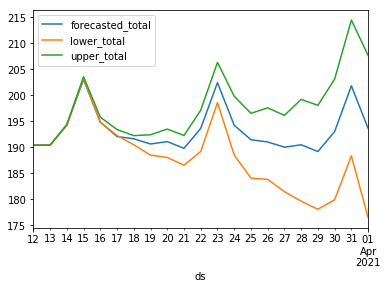

In [7]:
pd.set_option('display.max_columns', None)
# forecasted_portfolio.positions['lower_returns'].plot()
# forecasted_portfolio.positions['upper_returns'].plot()

# forecasted_portfolio.positions['forecasted_total'].plot()
# forecasted_portfolio.positions['lower_total'].plot()
# forecasted_portfolio.positions['upper_total'].plot()

# forecasted_portfolio.bars['GOOG']['yhat'].plot()
# forecasted_portfolio.bars['GOOG']['yhat_upper'].plot()
# forecasted_portfolio.bars['GOOG']['yhat_lower'].plot()



forecasted_portfolio.positions.columns



plt.legend(loc="upper left")
#forecast_returns['yhat']

In [16]:
result = pd.concat([returns, forecast_returns], axis=1)
result['date'] = result.index
result.tail(50)
# .fillna('null').replace(to_replace=0, value="null").to_dict(orient='records')

,GOOG,MMM,GOOG_position,GOOG_pos_diff,MMM_position,MMM_pos_diff,GOOG_cash,GOOG_holdings,GOOG_open,GOOG_close,MMM_cash,MMM_holdings,MMM_open,MMM_close,holdings,cash_diff,cash,total,returns,date,GOOG,MMM,GOOG_position,GOOG_pos_diff,MMM_position,MMM_pos_diff,GOOG_cash,GOOG_holdings,GOOG_yhat_upper_cash,GOOG_yhat_upper_holdings,GOOG_yhat_upper,GOOG_yhat_lower_cash,GOOG_yhat_lower_holdings,GOOG_yhat_lower,MMM_cash,MMM_holdings,MMM_yhat_upper_cash,MMM_yhat_upper_holdings,MMM_yhat_upper,MMM_yhat_lower_cash,MMM_yhat_lower_holdings,MMM_yhat_lower,forecasted_holdings,forecasted_cash_diff,forecasted_cash,forecasted_total,forecasted_returns,date,upper_holdings,cash_diff,upper_cash,upper_total,upper_returns,lower_holdings,lower_cash,lower_total,lower_returns
2021-01-29,0.33,0.33,0.33,0.0,0.33,0.0,0.0,609.236115,1846.170044,1835.739990,0.0,60.155698,182.289993,175.660004,669.391812,0.0,-558.894508,110.497304,-0.001431,2021-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-01,0.33,0.33,0.33,0.0,0.33,0.0,0.0,611.678082,1853.569946,1901.349976,0.0,58.070100,175.970001,174.699997,669.748183,0.0,-558.894508,110.853675,0.003225,2021-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-02,0.33,0.33,0.33,0.0,0.33,0.0,0.0,634.444819,1922.560059,1927.510010,0.0,58.162500,176.250000,175.020004,692.607319,0.0,-558.894508,133.712811,0.206210,2021-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-03,0.33,0.33,0.33,0.0,0.33,0.0,0.0,684.090000,2073.000000,2070.070068,0.0,57.875402,175.380005,175.479996,741.965402,0.0,-558.894508,183.070894,0.369135,2021-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-04,0.33,0.33,0.33,0.0,0.33,0.0,0.0,682.733665,2068.889893,2062.370117,0.0,58.010698,175.789993,177.100006,740.744362,0.0,-558.894508,181.849854,-0.006670,2021-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-05,0.33,0.33,0.33,0.0,0.33,0.0,0.0,683.100000,2070.000000,2098.000000,0.0,58.608002,177.600006,179.009995,741.708002,0.0,-558.894508,182.813494,0.005299,2021-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-08,0.33,0.33,0.33,0.0,0.33,0.0,0.0,694.950271,2105.909912,2092.909912,0.0,59.169001,179.300003,180.759995,754.119272,0.0,-558.894508,195.224764,0.067890,2021-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-09,0.33,0.33,0.33,0.0,0.33,0.0,0.0,685.918213,2078.540039,2083.510010,0.0,59.802600,181.220001,180.940002,745.720813,0.0,-558.894508,186.826305,-0.043019,2021-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-10,0.33,0.33,0.33,0.0,0.33,0.0,0.0,691.089287,2094.209961,2095.379883,0.0,60.020402,181.880005,181.080002,751.109689,0.0,-558.894508,192.215181,0.028844,2021-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-11,0.33,0.33,0.33,0.0,0.33,0.0,0.0,692.838303,2099.510010,2095.889893,0.0,59.185502,179.350006,177.210007,752.023805,0.0,-558.894508,193.129297,0.004756,2021-02-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-11,NaN,NaN

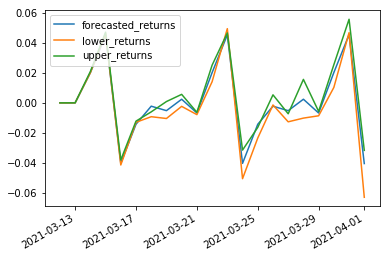

In [14]:
result['forecasted_returns'].plot()
result['lower_returns'].plot()
result['upper_returns'].plot()

plt.legend(loc="upper left")

[0.33, 0.33]
[0.33, 0.33]


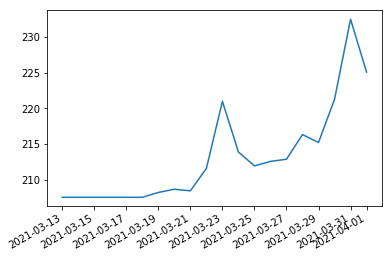

In [28]:
forecast = addReturns(forecast, 'yhat')
forecast_rfs = RandomStrategy(tickers, forecast, strategy)
forecasted_signals = forecast_rfs.genSignals()
forecasted_portfolio = MyPortfolio(tickers,forecast, forecasted_signals, forecasted_initial_cap)
#forecasted_portfolio.bars['GOOG']
forecast_returns = forecasted_portfolio.backtest_forecast().dropna()
# forecast_returns.head()
pd.concat([returns,forecast_returns], axis=1).replace(to_replace =0,value ="")['upper_total'].plot()

In [17]:
test = forecast['GOOG']
cols_wanted = ['yhat', 'yhat_upper', 'yhat_lower']
test = test[cols_wanted][test.index > '2021-03-12']
bar = portfolio.bars['GOOG']
pd.concat([bar,test], axis=1).fillna(0).replace(to_replace =0,value ="")

,High,Low,Open,Close,Volume,Adj Close,simple_returns,log_returns,cum_daily_return,yhat,yhat_upper,yhat_lower
2020-12-03,1847.2,1822.65,1824.01,1826.77,1.2273e+06,1826.77,,,,,,
2020-12-04,1833.16,1816.99,1824.52,1827.99,1.3782e+06,1827.99,0.000667829,0.000667606,0.000667829,,,
2020-12-07,1832.37,1805.78,1819,1819.48,1.3209e+06,1819.48,-0.00465539,-0.00466626,-0.00399067,,,
2020-12-08,1821.9,1796.2,1810.1,1818.55,1.0963e+06,1818.55,-0.000511097,-0.000511228,-0.00449973,,,
2020-12-09,1834.27,1767.81,1812.01,1784.13,1.5076e+06,1784.13,-0.0189272,-0.0191086,-0.0233418,,,
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-28,,,,,,,,,,2055.18,2123.5,2000.07
2021-03-29,,,,,,,,,,2051.8,2120.17,1991.2
2021-03-30,,,,,,,,,,2063.46,2137.73,1996.09
2021-03-31,,,,,,,,,,2089.15,2170.56,2016.89


In [3]:
class Weights(BaseModel):
    weights:  List[float] = []


    
weights = Weights()
weights.weights = [0.33,0.33]
weights_data = {
    'weights': weights
}
tickers = ['GOOG', 'MMM']
initial_captial = 100

strategy = [
    {
        'name': 'weighted',
        'params': weights
    }
]
with open("./stocks.pkl", "rb") as pkl_handle:
    bars = pickle.load(pkl_handle)
#tickers = [ticker]
bars = {key: bars[key] for key in tickers}
bars = addReturns(bars, 'Close')


rfs = RandomStrategy(tickers, bars, strategy)
signals = rfs.genSignals()
portfolio = MyPortfolio(tickers, bars, signals, initial_captial)

returns = portfolio.backtest_portfolio()
forecasted_initial_cap = returns['total'].iat[-1]

forecast = portfolio.forecast_portfolio()
forecast = addReturns(forecast, 'yhat')

forecast_rfs = RandomStrategy(tickers, forecast, strategy)
forecasted_signals = forecast_rfs.genSignals()
forecasted_portfolio = MyPortfolio(tickers, forecast, forecasted_signals, forecasted_initial_cap)
# forecasted_portfolio.bars['GOOG']
forecast_returns = forecasted_portfolio.backtest_forecast().dropna()

[0.33, 0.33]
[0.33, 0.33]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'self_define_cycle', 'self_define_cycle_lower',
       'self_define_cycle_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')
Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'self_define_cycle', 'self_define_cycle_lower',
       'self_define_cycle_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')
[0.33, 0.33]
[0.33, 0.33]


In [15]:
# forecast_returns['forecasted_total'].plot()
test = forecast_returns
test['date'] = test.index
# returns['total'].plot()
pd.concat([returns, test], axis=1).fillna('').replace(to_replace=0, value="")

,GOOG,MMM,GOOG_position,GOOG_pos_diff,MMM_position,MMM_pos_diff,GOOG_cash,GOOG_holdings,GOOG_open,GOOG_close,...,date,upper_holdings,cash_diff,upper_cash,upper_total,upper_returns,lower_holdings,lower_cash,lower_total,lower_returns
2020-12-03,,,,,,,,,1824.01,1826.77,...,,,,,,,,,,
2020-12-04,,,,,,,,,1824.52,1827.99,...,,,,,,,,,,
2020-12-07,,,,,,,,,1819,1819.48,...,,,,,,,,,,
2020-12-08,,,,,,,,,1810.1,1818.55,...,,,,,,,,,,
2020-12-09,,,,,,,,,1812.01,1784.13,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-28,,,,,,,,,,,...,2021-03-28 00:00:00,761.645,,-548.652,212.993,0.00391731,716.831,-520.036,196.794,-0.00529265
2021-03-29,,,,,,,,,,,...,2021-03-29 00:00:00,763.622,,-548.652,214.97,0.00928227,714.595,-520.036,194.559,-0.0113583
2021-03-30,,,,,,,,,,,...,2021-03-30 00:00:00,767.196,,-548.652,218.544,0.016624,717.42,-520.036,197.383,0.0145161
2021-03-31,,,,,,,,,,,...,2021-03-31 00:00:00,778.461,,-548.652,229.809,0.0515462,724.751,-520.036,204.715,0.0371411


In [12]:
returns

,GOOG,MMM,GOOG_position,GOOG_pos_diff,MMM_position,MMM_pos_diff,GOOG_cash,GOOG_holdings,GOOG_open,GOOG_close,MMM_cash,MMM_holdings,MMM_open,MMM_close,holdings,cash_diff,cash,total,returns,date
Date,,,,,,,,,,,,,,,,,,,,
2020-12-03,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.000000,1824.010010,1826.770020,0.0,0.000000,171.039993,171.830002,0.000000,0.0,100.000000,100.000000,0.000000,12/03/2020
2020-12-04,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.000000,1824.520020,1827.989990,0.0,0.000000,172.130005,172.460007,0.000000,0.0,100.000000,100.000000,0.000000,12/04/2020
2020-12-07,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.000000,1819.000000,1819.479980,0.0,0.000000,171.720001,170.149994,0.000000,0.0,100.000000,100.000000,0.000000,12/07/2020
2020-12-08,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.000000,1810.099976,1818.550049,0.0,0.000000,169.740005,172.460007,0.000000,0.0,100.000000,100.000000,0.000000,12/08/2020
2020-12-09,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.000000,1812.010010,1784.130005,0.0,0.000000,172.669998,175.289993,0.000000,0.0,100.000000,100.000000,0.000000,12/09/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-08,0.33,0.33,0.33,0.0,0.33,0.0,0.0,693.372861,2101.129883,2024.170044,0.0,59.726702,180.990005,183.770004,753.099563,0.0,-541.741115,211.358449,0.050087,03/08/2021
2021-03-09,0.33,0.33,0.33,0.0,0.33,0.0,0.0,683.100000,2070.000000,2052.699951,0.0,60.555000,183.500000,181.179993,743.655000,0.0,-541.741115,201.913885,-0.044685,03/09/2021
2021-03-10,0.33,0.33,0.33,0.0,0.33,0.0,0.0,683.680803,2071.760010,2055.030029,0.0,60.182098,182.369995,184.509995,743.862902,0.0,-541.741115,202.121787,0.001030,03/10/2021


In [ ]:
numstocks = len(tickers)
weights = getRandomWeights(numstocks)
print(weights)
#bars[bars.keys()]
list(bars.keys())
signals = pd.DataFrame(index=bars[next(iter(bars))].index)
for i in range(0,len(list(bars.keys()))):
    print(i)
    symbol = list(bars.keys())[i]
    print(list(bars.keys())[i])
    signals[symbol] = weights[i]
signals

In [ ]:
# Markowitz portfolios
# MSR: Max Sharpe Ratio and GMV Gloval Minimum Volatility Portfolios
port_returns = getPortReturns(bars)
risk_free= 0
markov_n = 100
numstocks = len(tickers)
df = pd.DataFrame(columns=["id","return","volatility"])
for x in range(0,markov_n):
    
    
    
    
    
    volatility = getPortWeightedVol(port_returns, weights)
    ann_ret = getPortWeightedAnnualReturn(port_returns,weights)
    row = {
        "id":x,
        "return":ann_ret,
        "volatility":volatility,
        "weights":weights
    }
    df = df.append(row,ignore_index=True)
df.head()

In [ ]:
df["sharpe"] = (df["return"] - risk_free) / df["volatility"]
MSR = df.sort_values(by=["sharpe"], ascending=False)
MSR_weights = MSR.iloc[0,0:numstocks]['weights']

GMV = df.sort_values(by=["volatility"],ascending=True)
GMV_weights = GMV.iloc[0,0:numstocks]
#print(MSR_weights)
#print(MSR.iloc[0,0:numstocks])
#getPortWeightedAnnualReturn(port_returns,MSR_weights)
print(GMV_weights)

In [ ]:
result={}
for stock in list(bars):
    bars[stock] = bars[stock].rename(columns={
                "ds":"Date",
                'y':'Close'
                })
    bars[stock] = bars[stock].drop(['Date'], axis=1)
    print(bars[stock].columns)
    
    bars[stock]['Date'] = bars[stock].index.strftime('%Y-%m-%d')
    #result[stock] = bars[stock].to_dict(orient='records')
    result[stock] = bars[stock].to_dict(orient='records')
json_compatible_item_data = jsonable_encoder(result)

In [ ]:
json_compatible_item_data['GOOG'][0]['Close']

In [ ]:
from utils import *

class Weights(BaseModel):
    weights:  List[float] = []


    
weights = Weights()
weights.weights = [0.33,0.33]
weights_data = {
    'weights': weights
}
tickers = ['GOOG', 'MMM']
initial_captial = 100

strategy = [
    {
        'name': 'weighted',
        'params': weights
    }
]
with open("./stocks.pkl", "rb") as pkl_handle:
    bars = pickle.load(pkl_handle)
#tickers = [ticker]
bars = {key: bars[key] for key in tickers}
bars = addReturns(bars, 'Close')

rfs = RandomStrategy(tickers, bars, strategy)
signals = rfs.genSignals()
portfolio = MyPortfolio(tickers, bars, signals, initial_captial)
#returns = portfolio.backtest_portfolio()
forecast = portfolio.forecast_portfolio()
forecast = addReturns(forecast, 'Open')

forecast_rfs = RandomStrategy(tickers, forecast, strategy)
forecasted_signals = forecast_rfs.genSignals()
forecasted_portfolio = MyPortfolio(tickers,forecast, forecasted_signals, initial_captial)
forecast_returns = forecasted_portfolio.backtest_forecast()

In [ ]:
forecast_returns.head()

In [ ]:
forecast_returns['GOOG_yhat_upper'].plot()
forecast_returns['GOOG_yhat_lower_holdings'].plot()
#forecast_returns['lower_total'].plot()

In [ ]:
portfolio = MyPortfolio(tickers, bars, signals, initial_captial)
returns = portfolio.backtest_portfolio()

In [ ]:
returns.tail(50)

In [ ]:
forecast = portfolio.forecast_portfolio()


In [ ]:
with open("./stocks.pkl", "rb") as pkl_handle:
    bars = pickle.load(pkl_handle)

In [ ]:
lastDate = bars['GOOG'].tail(1).index[0].strftime('%Y-%m-%d')
# bars[bars['GOOG'].index > lastDate]
lastDate
bars['GOOG'][bars['GOOG'].index >= lastDate]

In [ ]:
forecasted_return = portfolio.backtest_portfolio()


In [ ]:
portfolio.bars['GOOG'].tail()

In [ ]:
forecast_rfs = RandomStrategy(tickers, forecast, strategy)
forecasted_signals = forecast_rfs.genSignals()
forecasted_portfolio = MyPortfolio(tickers,forecast, forecasted_signals, initial_captial)
forecast_returns = forecasted_portfolio.backtest_portfolio()
forecast_returns.columns

In [ ]:
forecast_returns['returns'].plot()
df = forecast_returns

In [ ]:
mask = (df['date'] > '2021-03-01') & (df['date'] <= '2021-03-30')
print(df.loc[mask])

In [ ]:
df[df.index > '2021-03-01']

In [ ]:
portfolio.bars['GOOG']['yhat'].plot()